<img src=assets/UBA_header.png>

# **Universidad de Buenos Aires**

### Carrera de Especialización en Inteligencia Artificial
<br>

## **Proyecto final - Aprendizaje de Máquina**

### Cohorte 22 - Año 2025

## Autores
- [SIU a2208] Ariel Matias Cabello <arielmcabello@gmail.com>
- [SIU a2213] Ignacio Agustin Costarelli <agustin@costarellisa.com.ar>
- [SIU a2214] Alex Martín Curellich <alexcurellich@gmail.com>
<br>
<br>
Este repositorio contiene el material de resolución del Trabajo práctico integrador correspondiente correspondiente a la asignatura de aprendizaje de maquinas. <br>

# Imports y config iniciales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

# Ingesta del dataset

In [2]:
# Read dataset
path = pathlib.Path("dataset/one_million_mushrooms.csv")
df = pd.read_csv(path, delimiter=';')

# Analisis exploratorio de datos

### Detalles del dataset

| Columna               | Tipo    | Descripción general                                                                              | Valores posibles                                                                                                                                            |
|------------------------|---------|---------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| class                  | categ. | Clase del hongo según su toxicidad                                                                | e = comestible, p = venenoso                                                                                                                                |
| cap-diameter (cm)      | num.   | Diámetro del sombrero (píleo)                                                                      | número flotante en cm                                                                                                                                       |
| cap-shape              | categ. | Forma del sombrero                                                                                | b = campana, c = cónica, x = convexa, f = plana, s = hundida, p = esférica, o = otras                                                                        |
| cap-surface            | categ. | Textura de la superficie del sombrero                                                             | i = fibrosa, g = con surcos, y = escamosa, s = lisa, h = brillante, l = coriácea, k = sedosa, t = pegajosa, w = arrugada, e = carnosa                        |
| cap-color              | categ. | Color del sombrero                                                                               | n = marrón, b = beige, g = gris, r = verde, p = rosa, u = púrpura, e = rojo, w = blanco, y = amarillo, l = azul, o = naranja, k = negro                        |
| does-bruise-bleed      | categ. | Indica si presenta moretones o sangrado al cortarse                                              | t = sí, f = no                                                                                                                                              |
| gill-attachment        | categ. | Forma en que las laminillas se unen al tallo                                                     | a = adnada, x = adnexada, d = decurrente, e = libre, s = sinuada, p = poros, f = ninguna, ? = desconocido                                                   |
| gill-spacing           | categ. | Separación entre las laminillas                                                                 | c = cerrada, d = distante, f = ninguna                                                                                                                     |
| gill-color             | categ. | Color de las laminillas                                                                          | igual a cap-color + f = ninguna                                                                                                                            |
| stem-height (cm)       | num.   | Altura del tallo                                                                                | número flotante en cm                                                                                                                                       |
| stem-width (mm)        | num.   | Grosor del tallo                                                                                | número flotante en mm                                                                                                                                       |
| stem-root              | categ. | Forma de la base del tallo                                                                      | b = bulbosa, s = hinchada, c = en maza, u = copa, e = igual, z = rizomorfa, r = enraizada                                                                   |
| stem-surface           | categ. | Textura de la superficie del tallo                                                              | igual a cap-surface + f = ninguna                                                                                                                          |
| stem-color             | categ. | Color del tallo                                                                                | igual a cap-color + f = ninguno                                                                                                                            |
| veil-type              | categ. | Tipo de velo                                                                                   | p = parcial, u = universal                                                                                                                                  |
| veil-color             | categ. | Color del velo                                                                                 | igual a cap-color + f = ninguno                                                                                                                            |
| has-ring               | categ. | Indica si el tallo tiene anillo                                                                | t = sí, f = no                                                                                                                                              |
| ring-type              | categ. | Tipo de anillo                                                                                 | c = telaraña, e = evanescente, r = abierto, g = surcado, l = grande, p = colgante, s = envolvente, z = zona, y = escamoso, m = móvil, f = ninguno, ? = desconocido |
| spore-print-color      | categ. | Color de la impresión de esporas                                                                | igual a cap-color                                                                                                                                          |
| habitat                | categ. | Hábitat donde crece                                                                            | g = pastos, l = hojas, m = praderas, p = senderos, h = brezales, u = urbano, w = desechos, d = bosques                                                      |
| season                 | categ. | Estación en que aparece                                                                        | s = primavera, u = verano, a = otoño, w = invierno                                                                                       

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038000 entries, 0 to 1037999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1038000 non-null  object 
 1   cap-diameter          1038000 non-null  float64
 2   cap-shape             1038000 non-null  object 
 3   cap-surface           798000 non-null   object 
 4   cap-color             1038000 non-null  object 
 5   does-bruise-or-bleed  1038000 non-null  object 
 6   gill-attachment       870000 non-null   object 
 7   gill-spacing          612000 non-null   object 
 8   gill-color            1038000 non-null  object 
 9   stem-height           1038000 non-null  float64
 10  stem-width            1038000 non-null  float64
 11  stem-root             162000 non-null   object 
 12  stem-surface          390000 non-null   object 
 13  stem-color            1038000 non-null  object 
 14  veil-type             54000 non-nu

In [4]:
# Ajustar nombre de columnas
df.columns = df.columns.str.replace('-', '_')

### Analisis y tratamiento de faltantes

In [5]:
# Buscar "?" como valores faltantes
(df == "?").any()

 # Reemplazar ? por NaN (comentado por ahora porque no hay)
# df = df.replace('?', np.nan)

class                   False
cap_diameter            False
cap_shape               False
cap_surface             False
cap_color               False
does_bruise_or_bleed    False
gill_attachment         False
gill_spacing            False
gill_color              False
stem_height             False
stem_width              False
stem_root               False
stem_surface            False
stem_color              False
veil_type               False
veil_color              False
has_ring                False
ring_type               False
spore_print_color       False
habitat                 False
season                  False
dtype: bool

In [6]:
df.isnull().sum()

class                        0
cap_diameter                 0
cap_shape                    0
cap_surface             240000
cap_color                    0
does_bruise_or_bleed         0
gill_attachment         168000
gill_spacing            426000
gill_color                   0
stem_height                  0
stem_width                   0
stem_root               876000
stem_surface            648000
stem_color                   0
veil_type               984000
veil_color              912000
has_ring                     0
ring_type                42000
spore_print_color       930000
habitat                      0
season                       0
dtype: int64

<Axes: >

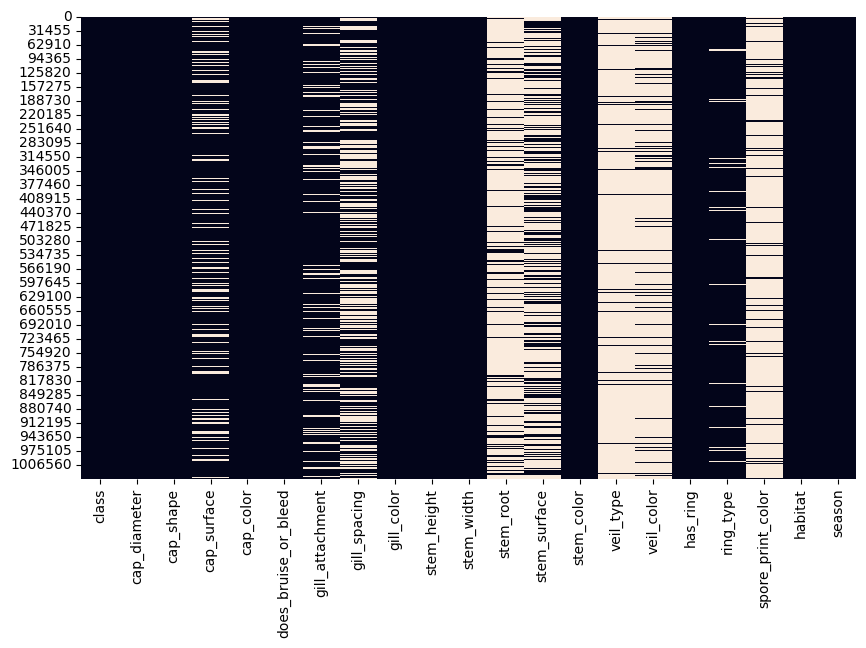

In [7]:
# Plot nulls heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)